<a href="https://colab.research.google.com/github/skyMei-J/Backpropagation-Implementation/blob/main/Backpropagation%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import scipy.linalg
import math

np.random.seed(0)

In [ ]:
def Sigmoid(x):
    y = 1.0/(1+np.exp(-x))
    return y
def Sigmoid_deriv(x):
    return Sigmoid(x)*(1.0-Sigmoid(x))
def CrossEntropy(X,Y):
    m , __ = Y.shape
    return (1./m)*(-((X*Y).sum()))

In [ ]:

def fc_forward(input,bias,weight):
    output = np.dot(input,weight) + bias
    return output

def fc_backward(output_g,weight,weight_g,back):
    input_g = np.dot(output_g,np.transpose(weight))
    backT = np.transpose(back)
    weight_g = np.dot(backT,output_g)
    bias_g = output_g.sum()
    return weight_g,bias_g,input_g


# def sigmoid_forward(input):
#     y = Sigmoid(input)
#     return y

def sigmoid_backward(dEdy,sig_back):
    dEdx = dEdy * Sigmoid_deriv(sig_back)
    return dEdx


def CrossEntropyLoss_forward(input, answer,back_target,back_predict):
    M = np.max(input)
    predict = np.exp(input-M)/((np.exp(input-M)).sum(axis=1,keepdims=True))
    back_target = answer
    back_predict = predict
    log_predict = (input-M)-np.log((np.exp(input-M)).sum(axis=1,keepdims=True))
    crossEntropyLoss =CrossEntropy(answer,log_predict)
    return predict, crossEntropyLoss   ,back_target, back_predict  

def CrossEntropyLoss_backward(back_target,back_predict):
    input_g = back_predict - back_target
    return input_g

# model

In [ ]:


class ANN(object):
    def __init__(self):
        self.fc1_weight = np.random.randn(2, 10) * -0.01
        self.fc1_bias = np.zeros((1, 10))
        self.fc1_weight_g = np.zeros((2,10))
        self.fc1_bias_g = np.zeros((1, 10))

        self.fc2_weight = np.random.randn(10, 20) * -0.01
        self.fc2_bias = np.zeros((1, 20))
        self.fc2_weight_g = np.zeros((10,20))
        self.fc2_bias_g = np.zeros((1, 20))
        
        self.fc3_weight = np.random.randn(20, 2) * -0.01
        self.fc3_bias = np.zeros((1, 2))
        self.fc3_weight_g= np.zeros((20,2))
        self.fc3_bias_g = np.zeros((1, 2))
        
        self.fc1_backward =0
        self.fc2_backward =0
        self.fc3_backward =0
        self.sig1_backward = 0
        self.sig2_backward = 0
        self.Cross_backward_answer =0
        self.Cross_backward_predict=0

    def forward(self, input, target):
        #layer 1
        h1 = fc_forward(input,self.fc1_bias,self.fc1_weight)
        a1 = Sigmoid(h1)
        #layer2
        h2 = fc_forward(a1,self.fc2_bias,self.fc2_weight)
        a2 = Sigmoid(h2)
        #output layer
        out = fc_forward(a2,self.fc3_bias,self.fc3_weight)
        pred, loss ,self.Cross_backward_answer,self.Cross_backward_predict= CrossEntropyLoss_forward(out, target,self.Cross_backward_answer,self.Cross_backward_predict)
        
        # backward propergation using forward value
        self.fc1_backward   =input
        self.sig1_backward1 = h1
        self.fc2_backward   = a1
        self.sig2_backward2 = h2
        self.fc3_backward   = a2
        return pred, loss

    def backward(self):
        out_g = CrossEntropyLoss_backward(self.Cross_backward_answer,self.Cross_backward_predict)
        self.fc3_weight_g,self.fc3_bias_g,a2_g = fc_backward(out_g,self.fc3_weight,self.fc3_weight_g,self.fc3_backward)
        
        h2_g = sigmoid_backward(a2_g,self.sig2_backward)
        self.fc2_weight_g,self.fc2_bias_g,a1_g = fc_backward(h2_g,self.fc2_weight,self.fc2_weight_g,self.fc2_backward)
        
        h1_g = sigmoid_backward(a1_g,self.sig1_backward)  
        self.fc1_weight_g,self.fc1_bias_g,_       = fc_backward(h1_g,self.fc1_weight,self.fc1_weight_g,self.fc1_backward)

    def update(self, lr):
        self.fc1_weight -= self.fc1_weight_g * lr
        self.fc1_bias   -= self.fc1_bias_g   * lr
        self.fc2_weight -= self.fc2_weight_g * lr
        self.fc2_bias   -= self.fc2_bias_g  * lr
        self.fc3_weight -= self.fc3_weight_g * lr
        self.fc3_bias   -= self.fc3_bias_g * lr


# DATA input

            x          y  label
0   93.485935  31.917719      0
1   60.727313  95.556634      1
2   57.615081  33.378930      0
3   27.365577   9.866993      0
4   32.179784  44.456337      1
..        ...        ...    ...
95  99.416372  79.917743      0
96  45.754881  42.525009      0
97  58.089464  66.537365      1
98  14.096091  70.581584      1
99  29.891224  38.914389      1

[100 rows x 3 columns]


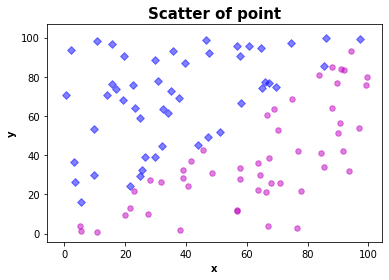

In [ ]:

df = pd.read_csv('data.txt', header = None, names = ['x','y','label'])
print(df)
def plot_sample(df):
    positive = df[df["label"]==1]#x<y
    negative = df[df["label"]==0]#x>y

    plt.xlabel("x", fontweight = "bold")              
    plt.ylabel("y", fontweight = "bold")
    plt.title("Scatter of point",fontsize = 15, fontweight = "bold")

    plt.scatter(negative["x"],negative["y"],c = "m",s = 30,alpha = .5,marker = "o") 
    plt.scatter(positive["x"],positive["y"],c = "b",s = 30,alpha = .5,marker = "D") 
    plt.show()
plot_sample(df)

# plot ground truth

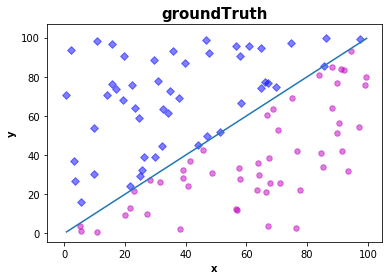

In [ ]:
def plot_line(xyc,answj,name):
    positive = xyc[df["label"]==1]#x<y
    negative = xyc[df["label"]==0]#x>y

    plt.xlabel("x", fontweight = "bold")              
    plt.ylabel("y", fontweight = "bold")
    plt.title(name,fontsize = 15, fontweight = "bold")

    plt.scatter(negative["x"],negative["y"],c = "m",s = 30,alpha = .5,marker = "o") 
    plt.scatter(positive["x"],positive["y"],c = "b",s = 30,alpha = .5,marker = "D") 

    xyc = np.array(xyc)
    maxx = np.max(xyc[:,0])
    minn = np.min(xyc[:,0])
    xp = np.linspace(minn+0.2, maxx+0.2, 100)
    p1 = -(answj[0]/answj[1])*xp-(answj[2]/answj[1])
    plt.plot(xp, p1)
    
groundTruth = [1,-1,0]
plot_line(df,groundTruth,"groundTruth")

## preprocessing

In [ ]:
training = np.array(df)
training = training[:,0:2]
trainingLabel = np.array(df['label'])
dataNum,n = training.shape

## produce label array

In [ ]:
labelArray = np.zeros((dataNum, 2), dtype = np.float32)

label_0 = np.zeros((1, 2), dtype = np.float32)
label_1 = np.zeros((1, 2), dtype = np.float32)
label_0[0][0]=1
label_1[0][1]=1

for i in range(dataNum):
        if trainingLabel[i] == 0:
            labelArray[i]=label_0
        else:
            labelArray[i]=label_1

## constant

In [ ]:
EPOCHS = 100000
Batch_size = 50
alpha = 1e-4

## Training

In [ ]:
model = ANN()
for epoch in range(EPOCHS):
    correct = 0
    loss = 0
    for start in range(int(dataNum/Batch_size)):
        packageS = start*Batch_size
        trainingBatch = training[packageS:packageS+Batch_size]
        labelBatch = labelArray[packageS:packageS+Batch_size]
        
        pred, train_loss = model.forward(trainingBatch,labelBatch)
    
        loss += train_loss
        predtion = np.argmax(pred, axis=1)
        
        for i in range(Batch_size):
            if predtion[i] == trainingLabel[packageS+i]:
                correct+=1
        model.backward()
        model.update(alpha)
    if((epoch+1)%10000==0):
        print('Epoch:%6d'%(epoch+1), '| Loss:%6.4e'%(loss/int(dataNum/Batch_size)), '| Accuracy:%5.4f'%(correct/dataNum*100.0))

Epoch: 10000 | Loss:7.4548e-03 | Accuracy:100.0000
Epoch: 20000 | Loss:1.7162e-03 | Accuracy:100.0000
Epoch: 30000 | Loss:9.2497e-04 | Accuracy:100.0000
Epoch: 40000 | Loss:6.2345e-04 | Accuracy:100.0000
Epoch: 50000 | Loss:4.6666e-04 | Accuracy:100.0000
Epoch: 60000 | Loss:3.7123e-04 | Accuracy:100.0000
Epoch: 70000 | Loss:3.0732e-04 | Accuracy:100.0000
Epoch: 80000 | Loss:2.6165e-04 | Accuracy:100.0000
Epoch: 90000 | Loss:2.2746e-04 | Accuracy:100.0000
Epoch:100000 | Loss:2.0095e-04 | Accuracy:100.0000


## output Prediction

In [ ]:
pred_list = []
for i in range(int(dataNum/Batch_size)):
    packageS = i*Batch_size
    pred, train_loss = model.forward(training[packageS:packageS+Batch_size], labelArray[packageS:packageS+Batch_size])
    predtion = np.argmax(pred, axis=1)
    predtion = predtion.tolist()
    pred_list += predtion

print(pred_list)
    

[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]


# create result dataframe

In [ ]:
df_test=df
df_label = pd.DataFrame(pred_list, columns=["label"])
df_test["label"] = df_label

# print(np.array(df_test))

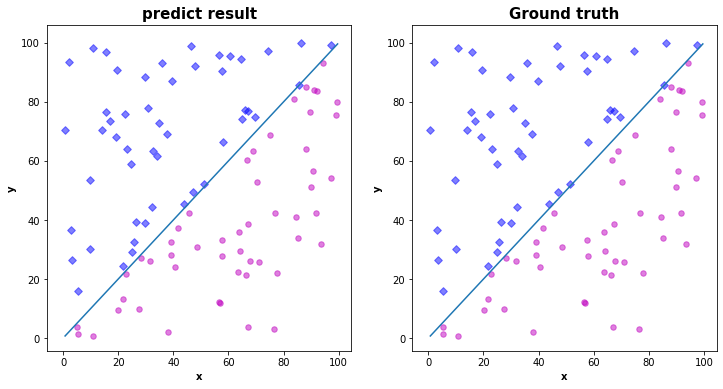

In [ ]:

def plot(ground,my_pred,answj):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2,1)
    plot_line(ground,answj,"predict result")
    plt.subplot(1, 2, 2)
    plot_line(my_pred,answj,"Ground truth")
    
plot(df_test,df,groundTruth)    